<a href="https://colab.research.google.com/github/bukshalishah/Deep-Learning/blob/master/IMDB_DataSet_Using_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import layers
from keras import models
from keras import activations
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max(max(sequence) for sequence in train_data)

9999

In [0]:
# Decode

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [0]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
  

In [0]:
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

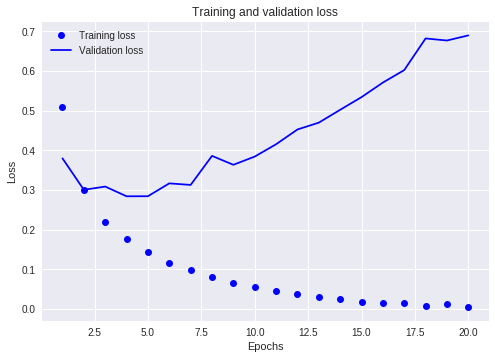

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

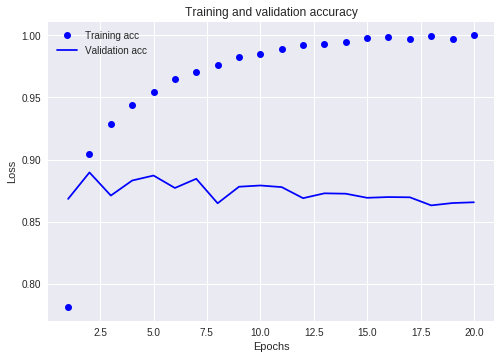

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# model = models.Sequential()
# model.add(layers.Dense(1024, activation=activations.relu, input_shape=(10000,)))
# model.add(layers.Dense(1024, activation=activations.relu))
# model.add(layers.Dense(512, activation=activations.relu))
# model.add(layers.Dense(1, activation=activations.sigmoid))

# model.compile(optimizer=optimizers.rmsprop(lr=0.0005), loss=losses.mean_squared_error, metrics=[metrics.binary_accuracy])

# model.fit(x_train, y_train, epochs=5, batch_size=1024)

# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print("Test Accuracy: ", test_accuracy, "\nTest Loss: ", test_loss)


In [0]:
def accuracy_test(Neurons, Activate, Optimizer, Losses, Epoch, Batch_size):
  model = models.Sequential()
  model.add(layers.Dense(int(Neurons), activation=Activate, input_shape=(10000,)))
  model.add(layers.Dense(int(Neurons), activation=Activate))
  model.add(layers.Dense(int(Neurons), activation=Activate))
  model.add(layers.Dense(1, activation='sigmoid'))
  
  model.compile(optimizer=Optimizer, loss=Losses, metrics=['accuracy'])
  
  model.fit(x_train, y_train,epochs=int(Epoch), batch_size=int(Batch_size))
  
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  return("Test Accuracy: ", test_accuracy, "\nTest Loss: ", test_loss)

In [20]:
print(accuracy_test(32,'relu', 'rmsprop', 'binary_crossentropy', 5, 1024))

Epoch 1/5
25000/25000 [==============================] - 2s 71us/step - loss: 0.5142 - acc: 0.7699
Epoch 2/5
25000/25000 [==============================] - 2s 61us/step - loss: 0.3056 - acc: 0.8884
Epoch 3/5
25000/25000 [==============================] - 2s 61us/step - loss: 0.2238 - acc: 0.9202
Epoch 4/5
25000/25000 [==============================] - 2s 60us/step - loss: 0.1927 - acc: 0.9281
Epoch 5/5
25000/25000 [==============================] - 2s 95us/step
('Test Accuracy: ', 0.87912, '\nTest Loss: ', 0.3157394136476517)
